In [2]:
from scipy.constants import *
import numpy as np
import matplotlib.pyplot as plt

## Resonant and nonresonant integrated third-order parametric down-conversion
Banic, Liscidini, Sipe (2022)

### A.1. Degenerate non-resonant SpTOPDC

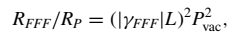

$ H_{FFF}^{(I)} (t) = - \int dk_1 dk_2 dk_3 M_{FFF}(k_1, k_2, k_3) \bar{a}_F^\dagger (k_1) \times \bar{a}_F^\dagger (k_2) \bar{a}_F^\dagger (k_3) e^{-i\Omega_{FFF}(k_1, k_2, k_3)t} + H. c. $

$ \Omega_{FFF}(k_1, k_2, k_3) = \omega_p - \omega_{Fk_1} - \omega_{Fk_2} - \omega_{Fk_3} $

$ M_{FFF}(k_1, k_2, k_3) = \hbar^2 L \frac{\omega_F}{3\sqrt{2\pi}^3} \bar{\phi_P} \sqrt{\upsilon_T \upsilon_F^3} \gamma_{FFF} \times \text{sinc}\left( \frac{\Delta \bar{k}_{FFF}L}{2}  \right) $

Wavenumber mismatch: $ \quad \Delta \bar{k}_{FFF} = \bar{k}_P - \bar{k}_1 - \bar{k}_2 - \bar{k}_3 $

$ \gamma_{FFF} = \frac{(\omega_F^3 \omega_P)^{1/4}}{\omega_F} \gamma_{FFFP} $

$ R_{FFF} = (|\gamma_{FFF}|L)^2 P_{vac}^2 \left( \frac{P_p}{\hbar \omega_P} \right); \quad P_{vac} = \frac{\hbar \omega_F}{\tau} $

In [64]:
L = 1e-2 # 1cm
lda_P = 0.57e-6 # micron
lda_F = 1.72e-6 # micron
omega_P = 2*pi*c/lda_P
omega_F = 2*pi*c/lda_F
gamma_FFF= 0.19 # (Wm)^-1
tau = 1/(2.9e4*1e9) # 11/(2.9x10^4 GHz)
P_vac = hbar*omega_F/tau # 3.3x10^-6 W
P_p = 100e-3 # 100mW

In [65]:
R_FFF = (gamma_FFF*L)**2 * P_vac**2 * P_p/(hbar*omega_P)

In [66]:
R_FFF

11.61977963579891

In [67]:
R_FFF/P_p

116.19779635798909

### A.2. Degenerate resonant SpTOPDC

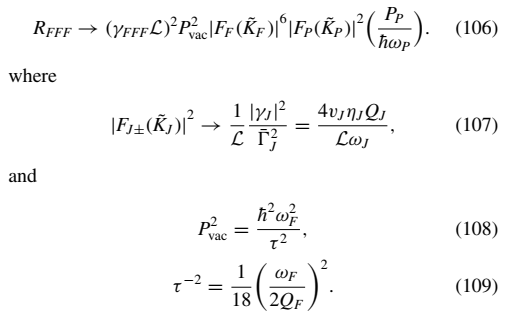

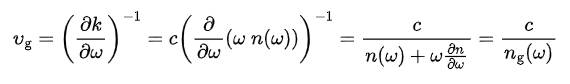

In [100]:
# Optical parameters (excitation)
lda_P = 0.57e-6 # micron
lda_F = 1.72e-6 # micron
omega_P = 2*pi*c/lda_P
omega_F = 2*pi*c/lda_F
P_p = 100e-3 # 100mW

# Geometric parameters (resonator)
L = 750e-6 # Length
Q_F = 1e7 # Quality factor
Q_P = 1e5 # Quality factor
nu_F = 0.5 # Escape efficiency
nu_P = 0.5 # Escape efficiency

# Material paeameters
ngF = 2.1
ngP = 2.3
ups_F = c/ngF
ups_P = c/ngP

# Derived physical parameters from quantum nonlinear interaction
gamma_FFF= 0.19 # (Wm)^-1
tau = 1/(1.3e-2*1e9) # 11/(1.3x10^-2 GHz)
P_vac = hbar*omega_F/tau # 1.5x10^-12 W

F_F =np.sqrt(4*ups_F*nu_F*Q_F/(L*omega_F))
F_P =np.sqrt(4*ups_P*nu_P*Q_P/(L*omega_P))

R_FFF_Resonant = (gamma_FFF*L)**2 * P_vac**2 * F_F**6 * F_P**2 * P_p / (hbar*omega_P)


In [101]:
R_FFF_Resonant

0.0058028461903668225

### B.1 Non resonant StTOPDC

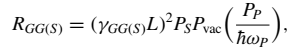

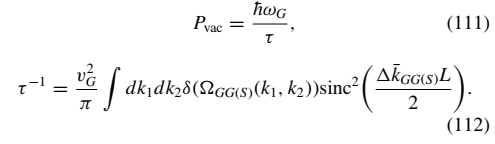

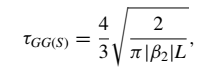

In [107]:
# Optical parameters
lda_P = 0.57e-6 #um
lda_S = 2.3e-6
lda_G = 1.52e-6
omega_P = 2*pi*c/lda_P
omega_G = 2*pi*c/lda_G
P_S = 10e-3
P_P = 100e-3

# Geometric patrameters (waveguide)
L = 1e-2 # Length

# Derived physical parameters from quantum nonlinear interaction
gamma_GGS= 0.19 # (Wm)^-1
tau = 1/(4.5e4*1e9) # 1/(4x10^4 GHz)
P_vac = 5.3e-6 # 

R_GGS = (gamma_GGS*L)**2 * P_S * P_vac * (P_P)/(hbar*omega_P)

In [108]:
R_GGS

54901.11880347297

### B.2 Resonant StTOPDC

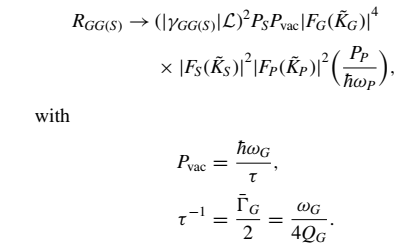

In [113]:
# Optical parameters
lda_G = 1.52e-6
lda_S = 2.3e-6
lda_P = 0.57e-6

omega_G = 2*pi*c/lda_G
omega_S = 2*pi*c/lda_S
omega_P = 2*pi*c/lda_P
P_S = 20e-6
P_P = 100e-3

# Geometric patrameters (resonator)
L = 750e-6 # Length
Q_G = 1e7
Q_S = 1e7
Q_P = 1e5

# Derived physical parameters from quantum nonlinear interaction
gamma_GGS= 0.19 # (Wm)^-1
tau = 1/(3.1e-2*1e9) # 1/(3.1x10^-2 GHz)
P_vac = 4e-12 # 

# Material paeameters
ngG = 2.1
ngS = 2.1
ngP = 2.3
ups_G = c/ngG
ups_S = c/ngS
ups_P = c/ngP

F_G =np.sqrt(4*ups_G*nu_G*Q_G/(L*omega_G))
F_S =np.sqrt(4*ups_S*nu_S*Q_S/(L*omega_S))
F_P =np.sqrt(4*ups_P*nu_P*Q_P/(L*omega_P))

R_GGS_R = (gamma_GGS*L)**2 * P_S * P_vac * F_G**4 * F_S**2 * F_P**2 * (P_P)/(hbar*omega_P)

In [114]:
R_GGS_R

215068.81490163232

## Phase-matching analysis

In [402]:
# From Banic-Liscinidi-Sipe (2022)
lda_P = 0.57e-6
lda_F = 3*lda_P
lda_G = 1.52e-6
lda_S = 2.3e-6

omega_P = 2*np.pi*c/lda_P
omega_F = 2*np.pi*c/(3*lda_P)
omega_G = 2*np.pi*c/(lda_G)
omega_S = 2*np.pi*c/(lda_S)

detune = omega_G-omega_F

In [403]:
from scipy.interpolate import interp1d
import pandas as pd

Si3N4 = pd.read_csv('Materials/Si3N4_Luke.csv')
nSi3N4_func = interp1d(Si3N4['wl (um)'],Si3N4['n'], fill_value='extrapolate')

Si = pd.read_csv('Materials/Si_Schinke.csv')
nSi_func = interp1d(Si['wl_um'], Si['n_Si'], fill_value='extrapolate')
kSi_func = interp1d(Si['wl_um'], Si['k_Si'], fill_value='extrapolate')

In [496]:
lda_P = 0.57e-6
omega_P = 2*np.pi*c/lda_P
omega_detune = omega_P/50

def ec_triplet_nd(omega_P,omega_detune):
    # non dispersive
    n=2.0 #Si3N4
    
    omega_F = omega_P/3
    omega_G = omega_F + omega_detune
    omega_S = omega_F - 2*omega_detune
    
    delk = (n*omega_P - 2*n*omega_G - n*omega_S)
    
    lda_G = (2*np.pi*c/omega_G)*1e6 #um
    lda_S = (2*np.pi*c/omega_S)*1e6 #um
    
    return lda_G,lda_S,delk

def ec_triplet_Si3N4(omega_P,omega_detune):
    # dispersive Si3N4  
    
    omega_F = omega_P/3
    omega_G = omega_F + omega_detune
    omega_S = omega_F - 2*omega_detune
    
    lda_P = (2*np.pi*c/omega_P)*1e6
    lda_G = (2*np.pi*c/omega_G)*1e6
    lda_S = (2*np.pi*c/omega_S)*1e6
    
    delk = (nSi3N4_func(lda_P)*omega_P - (2*nSi3N4_func(lda_G)*omega_G + nSi3N4_func(lda_S)*omega_S))/c
    
    return lda_G,lda_S,delk

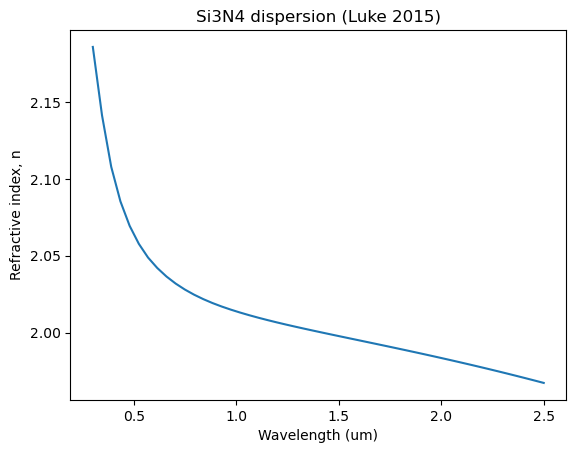

In [497]:
lda_range = np.linspace(0.3,2.5,50)

plt.figure()
plt.plot(lda_range,nSi3N4_func(lda_range))
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index, n')
plt.title('Si3N4 dispersion (Luke 2015)')
plt.show()

In [510]:
lda_P = 0.57e-6
omega_P = 2*np.pi*c/lda_P
omega_detune = omega_P/50
detune_range = np.linspace(detune-10*(detune/10),detune+10*(detune/10),100)

lda_G_range,lda_S_range,delk_Si3N4=ec_triplet_Si3N4(omega_P,detune_range)

lda_G_paper,lda_S_paper,delk_paper=ec_triplet_Si3N4(omega_P,detune)

In [511]:
ec_triplet_Si3N4(omega_P,detune)

(1.52, 2.2800000000000002, 630378.832119726)

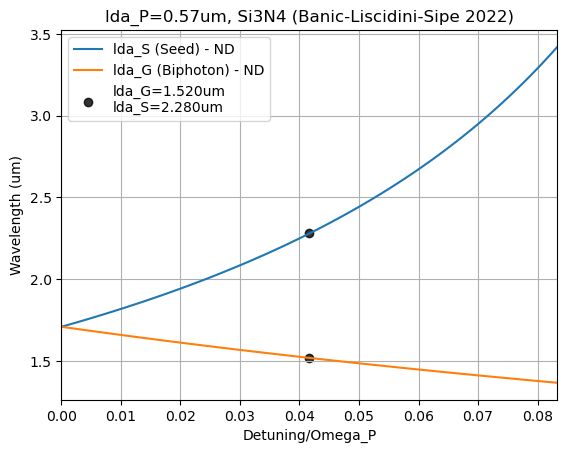

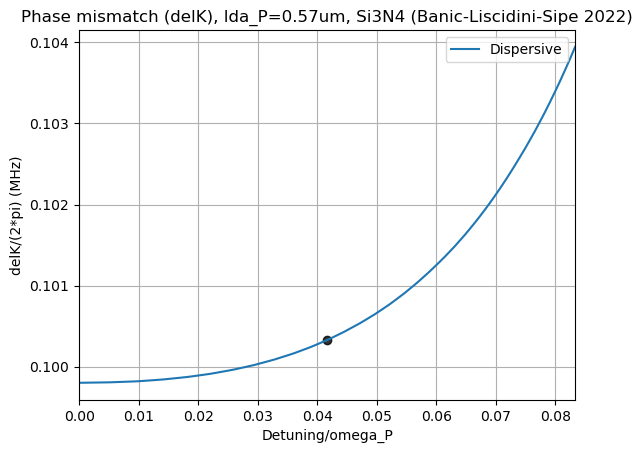

In [516]:
plt.figure()
plt.title('lda_P=0.57um, Si3N4 (Banic-Liscidini-Sipe 2022)')
plt.plot(detune_range/omega_P,lda_S_range,'-',label='lda_S (Seed) - ND')
plt.plot(detune_range/omega_P,lda_G_range,'-',label='lda_G (Biphoton) - ND')
# plt.plot(detune_range/omega_P,lda_S_range2,'-',label='lda_S (Seed) - ND (lda_P2 = 0.532um)')
# plt.plot(detune_range/omega_P,lda_G_range2,'-',label='lda_G (Biphoton) - ND (lda_P2 = 0.532um)')


plt.scatter([detune/omega_P,detune/omega_P],[lda_G_paper,lda_S_paper],color='k',alpha=0.8,label='lda_G=%0.3fum\nlda_S=%0.3fum' %(lda_G_paper,lda_S_paper))
#plt.axvline(detune/1e9,linestyle='--',alpha=0.8,color='k')
plt.legend()
plt.grid()
plt.xlabel('Detuning/Omega_P')
plt.ylabel('Wavelength (um)')
plt.xlim(detune_range[0]/omega_P,detune_range[-1]/omega_P)
plt.show()

plt.figure()
plt.title('Phase mismatch (delK), lda_P=0.57um, Si3N4 (Banic-Liscidini-Sipe 2022)')
plt.plot(detune_range/omega_P,delk_Si3N4/(2*pi*1e6),label='Dispersive')
plt.scatter([detune/omega_P],[delk_paper/(2*pi*1e6)],color='k',alpha=0.8)
# plt.semilogy(detune_range/omega_P,delk_nd/omega_P,label='Non disersive')
plt.xlabel('Detuning/omega_P')
plt.ylabel('delK/(2*pi) (MHz)')
plt.grid()
plt.legend()
plt.xlim(detune_range[0]/omega_P,detune_range[-1]/omega_P)
plt.show()

### Silicon

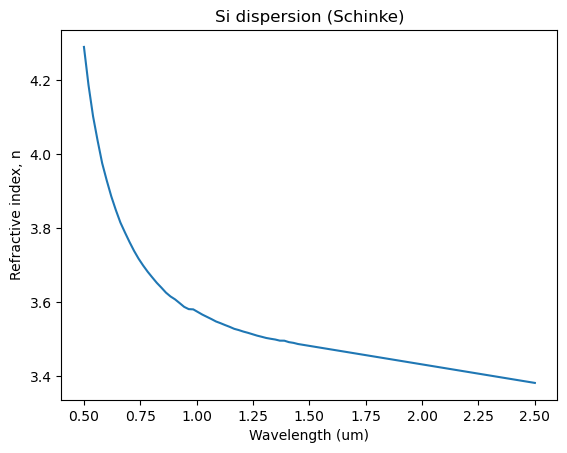

In [425]:
lda_range = np.linspace(0.5,2.5,100)

plt.figure()
plt.plot(lda_range,nSi_func(lda_range))
plt.xlabel('Wavelength (um)')
plt.ylabel('Refractive index, n')
plt.title('Si dispersion (Schinke)')
plt.show()

In [423]:
nSi_func(0.532),nSi_func(1.0),nSi_func(1.5),nSi_func(2),nSi_func(2.5),

(array(4.1366), array(3.575), array(3.482), array(3.432), array(3.382))

In [517]:
def ec_triplet_nd(omega_P,omega_detune):
    # non dispersive
    n=3.5 #Si
    
    omega_F = omega_P/3
    omega_G = omega_F + omega_detune
    omega_S = omega_F - 2*omega_detune
    
    delk = (n*omega_P - 2*n*omega_G - n*omega_S)
    
    lda_G = (2*np.pi*c/omega_G)*1e6 #um
    lda_S = (2*np.pi*c/omega_S)*1e6 #um
    
    return lda_G,lda_S,delk

def ec_triplet_Si(omega_P,omega_detune):
    # dispersive Si 
    
    omega_F = omega_P/3
    omega_G = omega_F + omega_detune
    omega_S = omega_F - 2*omega_detune
    
    lda_P = (2*np.pi*c/omega_P)*1e6
    lda_G = (2*np.pi*c/omega_G)*1e6
    lda_S = (2*np.pi*c/omega_S)*1e6
    
    delk = (nSi_func(lda_P)*omega_P - (2*nSi_func(lda_G)*omega_G + nSi_func(lda_S)*omega_S))/c
    
    return lda_G,lda_S,delk

In [456]:
delKK = nSi_func(1)*omega_P - (2*nSi_func(1)*omega_G + nSi_func(1)*omega_S)

In [464]:
delKK

25682892269752.0

In [458]:
delKK/c

85668.90722031439

In [477]:
lda_range=np.linspace(0.57,2.5,100)
# degenerate
lda_P = 0.57
lda_F = 3*lda_P

delk = nSi_func(lda_P)*(2*np.pi*c/lda_P) - 3*nSi_func(lda_F)*(2*np.pi*c/(3*lda_F))

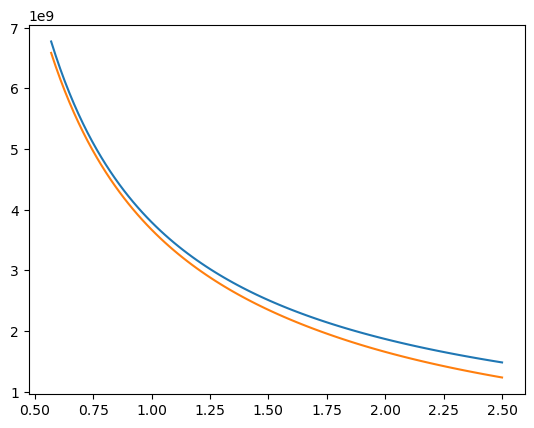

In [489]:
plt.plot(lda_range,nSi3N4_func(lda_range)*(2*np.pi*c/lda_range))
plt.plot(lda_range,3*nSi3N4_func(3*lda_range)*(2*np.pi*c/(3*lda_range)))

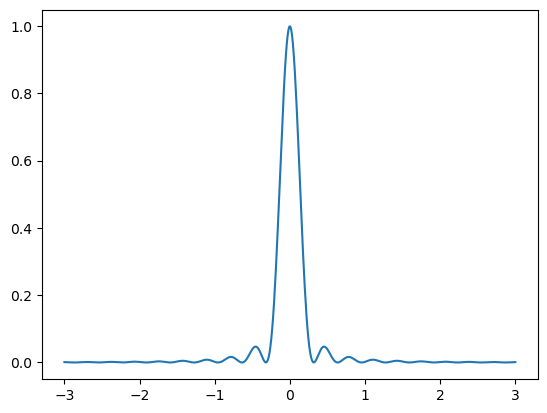

In [484]:
k_range = np.linspace(-3*np.pi, 3*np.pi,500)
plt.plot(k_range/np.pi,np.sinc(k_range)**2)

In [452]:
np.sinc(delKK/c * 1e-6/2)**2

0.00021308718758731175

In [453]:
0.57*3

1.71

In [527]:
lda_P = 0.57e-6
omega_P = 2*np.pi*c/lda_P
omega_detune = omega_P/50

detune_range = np.linspace(detune-10*(detune/10),detune+10*(detune/10),100)
lda_G_range_disp,lda_S_range_disp,delk_Si=ec_triplet_Si(omega_P,detune_range)

lda_G_paper,lda_S_paper,delk_Si_paper=ec_triplet_Si(omega_P,detune)



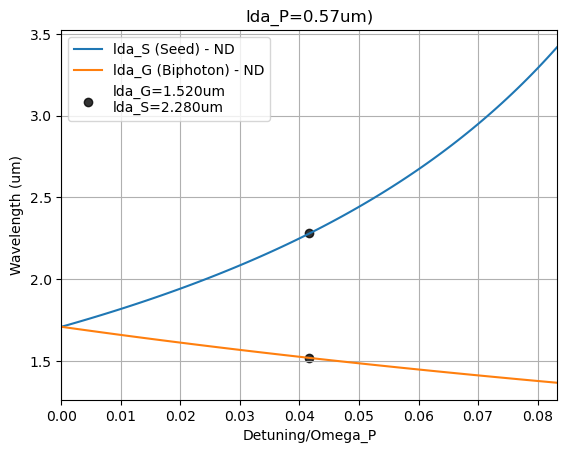

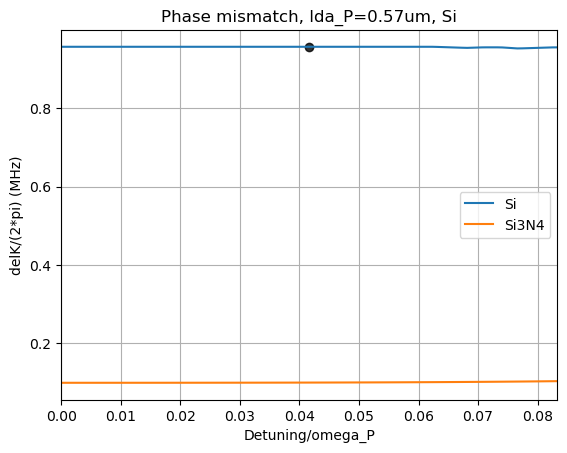

In [531]:
plt.figure()
plt.title('lda_P=0.57um)')
plt.plot(detune_range/omega_P,lda_S_range,'-',label='lda_S (Seed) - ND')
plt.plot(detune_range/omega_P,lda_G_range,'-',label='lda_G (Biphoton) - ND')

plt.scatter([detune/omega_P,detune/omega_P],[lda_G_paper,lda_S_paper],color='k',alpha=0.8,label='lda_G=%0.3fum\nlda_S=%0.3fum' %(lda_G_paper,lda_S_paper))
#plt.axvline(detune/1e9,linestyle='--',alpha=0.8,color='k')
plt.legend()
plt.grid()
plt.xlabel('Detuning/Omega_P')
plt.ylabel('Wavelength (um)')
plt.xlim(detune_range[0]/omega_P,detune_range[-1]/omega_P)
plt.show()

plt.figure()
plt.title('Phase mismatch, lda_P=0.57um, Si')
plt.plot(detune_range/omega_P,delk_Si/(2*pi*1e6),label='Si')
plt.plot(detune_range/omega_P,delk_Si3N4/(2*pi*1e6),label='Si3N4')
plt.scatter([detune/omega_P],[delk_Si_paper/(2*pi*1e6)],color='k',alpha=0.8)
plt.xlabel('Detuning/omega_P')
plt.ylabel('delK/(2*pi) (MHz)')
plt.grid()
plt.legend()
plt.xlim(detune_range[0]/omega_P,detune_range[-1]/omega_P)
plt.show()

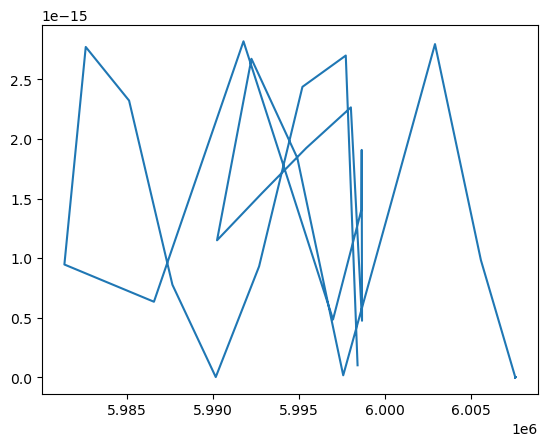

In [436]:
delk_range = np.linslapce(delk_

plt.plot(delk_disp, np.sinc(delk_disp)**2)

In [241]:
2*np.pi*2*1e6/(omega_G-omega_F)

9.126313644621441e-08

In [184]:
abs(omega_S-omega_F)/(omega_G-omega_F)

2.052173913043478

In [209]:
omega_G-omega_F

137693828019653.0

In [178]:
ec_triplet(lda_P,6.8e-6)

(1.7100000000000001e-06, 1.3663924794359578e-06, 3.4402366863905334e-06)

In [121]:
1/lda_P

1754385.9649122804

In [122]:
1/lda_S + 2/lda_G

1750572.0823798627

In [ ]:
det

## Generated of photon pairs by stimulated emission in ring resonators
Banic, Liscidini, Sipe (2022)

### Degenerate resonant spontaneous TOPDC


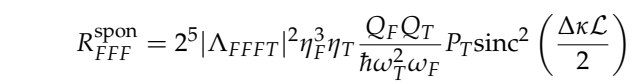

In [58]:
Q_F = 4e5 # daughter quality factor
Q_T = 6.4e4 # daughter quality factor
nu_F = 0.5 # daughter coupling efficiency
nu_T = 0.5 # pump coupling efficiency
del_KL_over2 = np.linspace(-3*np.pi, 3*np.pi, 1000)
delKL_over2 = 0
Delta_FFFT = 0.99 #s^-1
omega_T = (2*np.pi*c)/532e-9 
omega_F = omega_T/3

def R_Spon_FFF(omega_T,Q_F,Q_T):
    omega_F = omega_T/3
    R_spon_FFF = 2**5 * Delta_FFFT**2 * nu_F**3 * nu_T * (Q_F*Q_T)/(hbar * omega_T**2 *omega_F) * np.sinc(delKL_over2)**2
    return R_spon_FFF

In [59]:
R_Spon_FFF(omega_T,Q_F,Q_T)

0.03216019155358964

Very low efficiency

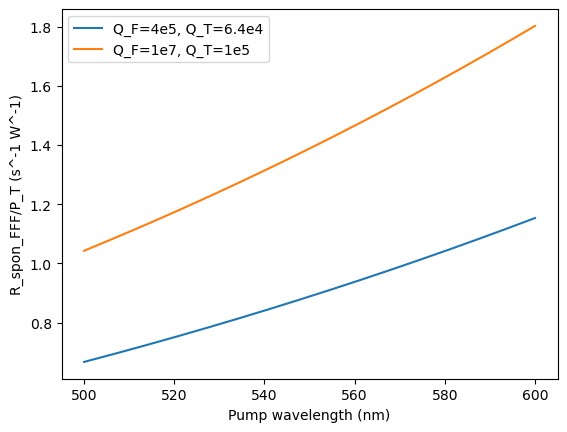

In [117]:
lambda_range = np.linspace(500,600,1000)*1e-9
omega_range = (2*np.pi*c)/lambda_range

plt.figure()
plt.plot((2*np.pi*c)*1e9/omega_range, R_Spon_FFF(omega_range,Q_F,Q_T),label='Q_F=4e5, Q_T=6.4e4')
plt.plot((2*np.pi*c)*1e9/(omega_range), R_Spon_FFF(omega_range,1e7,1e5),label='Q_F=1e7, Q_T=1e5')
plt.xlabel('Pump wavelength (nm)')
plt.ylabel('R_spon_FFF/P_T (s^-1 W^-1)')
plt.legend()

### Degenerate resonant stimulated TOPDC

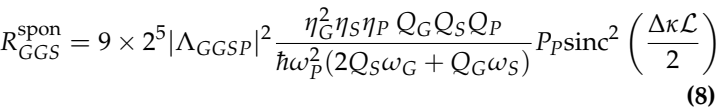
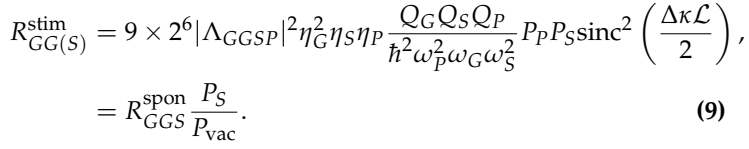

In [91]:
Q_G = 4e5 # daughter quality factor
Q_S = 4e5 # seed quality factor
Q_P = 6.4e4 # pump quality factror
nu_G = 0.5 # daughter coupling efficiency
nu_S = 0.5 # seed coupling efficiency
nu_P = 0.5 # pump coupling efficiency
delKL_over2 = 0
Delta_FFFT = 0.99 #s^-1
Delta_GGSP = 0.99 #s^-1
omega_P = (2*np.pi*c)/532e-9 
omega_G = omega_P/3
omega_S = omega_P/3

def R_Stim_GGS(omega_P):
    omega_G = omega_P/3
    omega_S = omega_P/3
    R_spon_GGS = 9 * 2**5 * Delta_GGSP**2 * (nu_G**2 * nu_S * nu_P * Q_G*Q_S*Q_P)/(hbar * omega_P**2 * (2*Q_S*omega_G + Q_G*omega_S)) * np.sinc(delKL_over2)**2
    Gamma_S = omega_S/(2*Q_S)
    Gamma_G = omega_G/(2*Q_G)
    P_vac = hbar*omega_S/(2/Gamma_S + 1/Gamma_G)
    R_stim_GGS = R_spon_GGS/P_vac
    return R_stim_GGS

In [92]:
R_Stim_GGS(omega_P)

1576302606.399178

Promising efficiency

Text(0, 0.5, 'R_stim_GGS/(P_P*P_S) (s^-1 W^-2)')

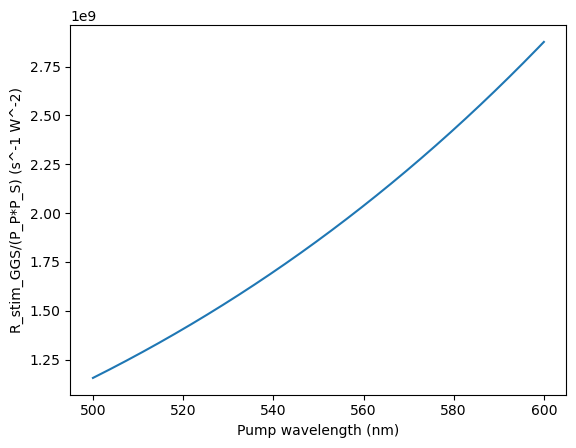

In [95]:
lambda_range = np.linspace(500,600,1000)*1e-9
omega_range = (2*np.pi*c)/lambda_range

plt.figure()
plt.plot((2*np.pi*c)*1e9/omega_range, R_Stim_GGS(omega_range))
plt.xlabel('Pump wavelength (nm)')
plt.ylabel('R_stim_GGS/(P_P*P_S) (s^-1 W^-2)')

### Stimulated emission tomography via StTOPDC

![image.png](attachment:c2560614-caea-4fad-a109-08cfd5d598a6.png)

![image.png](attachment:801009ef-fd34-437a-bede-616090bdc945.png)

## Silicon and SiO2 dispersion

In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

In [193]:
Si = pd.read_csv('Schinke_Si.csv')
SiO2 = pd.read_csv('Rodriguez-deMarcos_SiO2.csv')

In [312]:
from scipy.interpolate import interp1d
import pandas as pd
Si3N4 = pd.read_csv('Materials/Si3N4_Luke.csv')
nSi3N4_func = interp1d(Si3N4['wl (um)'],Si3N4['n'], fill_value='extrapolate')

2.0137513327142855

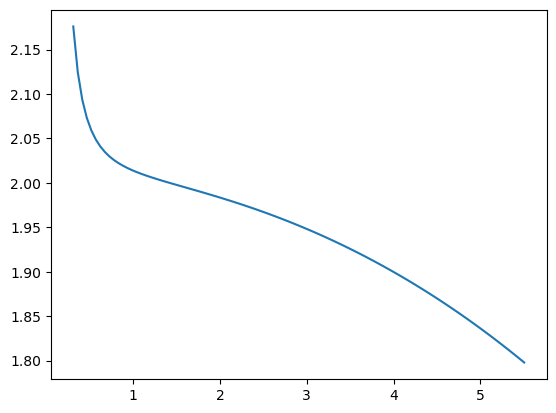

In [311]:
plt.plot(Si3N4['wl (um)'],Si3N4['n'])

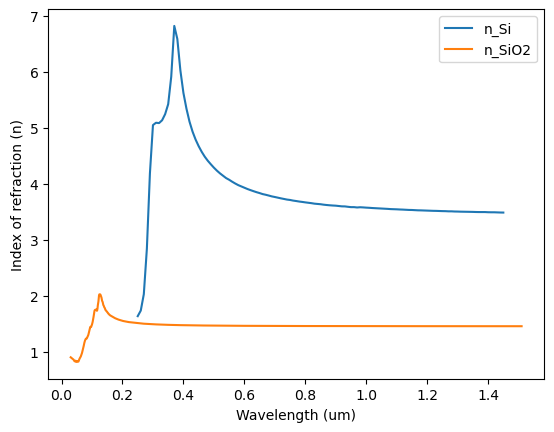

In [194]:
plt.plot(Si['wl_um'], Si['n_Si'], label='n_Si')
plt.plot(SiO2['wl_um'], SiO2['n_SiO2'], label='n_SiO2')
plt.xlabel('Wavelength (um)')
plt.ylabel('Index of refraction (n)')
plt.legend()

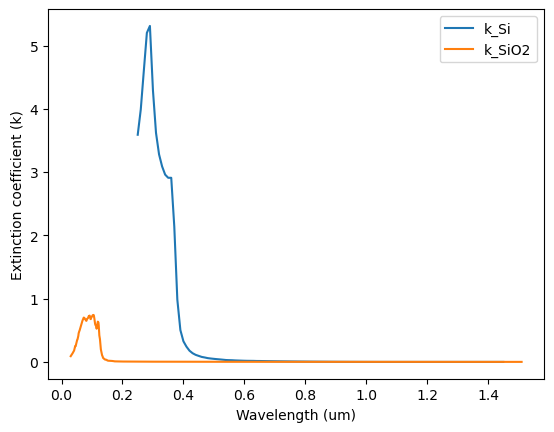

In [195]:
plt.plot(Si['wl_um'], Si['k_Si'], label='k_Si')
plt.plot(SiO2['wl_um'], SiO2['k_SiO2'], label='k_SiO2')
plt.xlabel('Wavelength (um)')
plt.ylabel('Extinction coefficient (k)')
plt.legend()

In [196]:
nSi_func = interp1d(Si['wl_um'], Si['n_Si'], fill_value='extrapolate')
kSi_func = interp1d(Si['wl_um'], Si['k_Si'], fill_value='extrapolate')
nSiO2_func = interp1d(SiO2['wl_um'], SiO2['n_SiO2'], fill_value='extrapolate')
kSiO2_func = interp1d(SiO2['wl_um'], SiO2['k_SiO2'], fill_value='extrapolate')

In [199]:
wavelength = np.linspace(0.2,2.0,1000)
Si_interp_val = nSi_func(wavelength)

In [203]:
nSi_func(1.0),nSi_func(1.55), nSi_func(2.0)

(array(3.575), array(3.477), array(3.432))

In [202]:
kSi_func(0.57), kSi_func(1.55)

(array(0.0237), array(-1.81e-13))

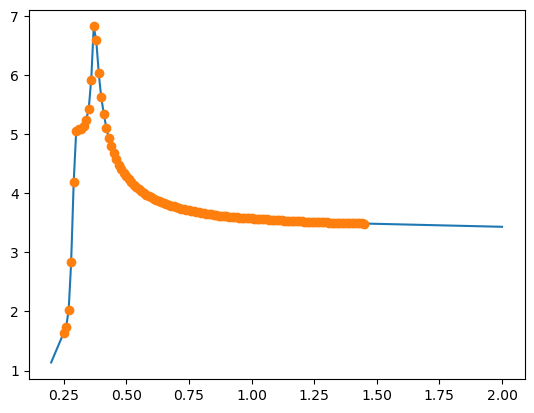

In [16]:
plt.plot(wavelength, Si_interp_val)
plt.plot(Si['wl_um'], Si['n_Si'], 'o')

In [23]:
lda_P = 0.532
lda_F = lda_P*3
nSi_func(lda_P)-nSi_func(lda_F)

0.6641999999999979